1. Gopal Singh
2. Devam Sharma
3.Chetan Sai Kurra
Topic - Mortality rate prediction 




Import required libraries

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
%matplotlib inline 


Import Dataset and displayed it in dataframe

In [0]:

covid_df     = pd.read_csv('/content/drive/My Drive/Datasets-611/covid_19_clean_complete.csv')


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
covid_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27979,NaN,Western Sahara,24.215500,-12.885800,5/6/20,6,0,5
27980,NaN,Sao Tome and Principe,0.186360,6.613081,5/6/20,174,3,4
27981,NaN,Yemen,15.552727,48.516388,5/6/20,25,5,0
27982,NaN,Comoros,-11.645500,43.333300,5/6/20,8,1,0


Date column is converted to date format using pandas.to_datetime

In [0]:

covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
27979,NaN,Western Sahara,24.215500,-12.885800,2020-05-06,6,0,5
27980,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-06,174,3,4
27981,NaN,Yemen,15.552727,48.516388,2020-05-06,25,5,0
27982,NaN,Comoros,-11.645500,43.333300,2020-05-06,8,1,0


In [0]:
# Create new column Active = Confirmed - Deaths - Recovered
covid_df['Active'] = covid_df['Confirmed'] - covid_df['Deaths'] - covid_df['Recovered']
# Create new column Mortality = Deaths / Confirmed
covid_df['Mortality'] = (covid_df['Deaths'] / covid_df['Confirmed'])*100

In [0]:
#All the missing values are replaced with zero.
covid_df.fillna(value=0, inplace=True) 
covid_df = covid_df.groupby(['Country/Region', 'Date'], as_index=False).sum()

In [0]:
#Confirmed cases and Deaths per each day and Country/region are summed
mortalityRate=covid_df.groupby(['Country/Region','Date'])['Country/Region','Confirmed','Deaths'].sum() 
#Max value for each coutry is considered. Which is the last date of the dataframe
mortalityRate=mortalityRate.groupby('Country/Region').max().reset_index() 
# Moratality rate is caluclated based on confirmed and deaths and added as new column
mortalityRate['Mortality Rate']=(mortalityRate['Deaths']/ mortalityRate['Confirmed'])*100
mortalityRate


,Country/Region,Confirmed,Deaths,Mortality Rate
0,Afghanistan,3392,104,3.066038
1,Albania,832,31,3.725962
2,Algeria,4997,476,9.525715
3,Andorra,751,46,6.125166
4,Angola,36,2,5.555556
...,...,...,...,...
182,West Bank and Gaza,484,4,0.826446
183,Western Sahara,6,0,0.000000
184,Yemen,25,5,20.000000
185,Zambia,146,4,2.739726


In [0]:
# Mortality rate of US 
mortalityRate.loc[mortalityRate['Country/Region'] == 'US']

,Country/Region,Confirmed,Deaths,Mortality Rate
173,US,1228603,73431,5.976788


In [0]:
#Mortality rate of Italy
mortalityRate.loc[mortalityRate['Country/Region'] == 'Italy']

,Country/Region,Confirmed,Deaths,Mortality Rate
85,Italy,214457,29684,13.841469


In [0]:
covid_df

,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered,Active,Mortality
0,Afghanistan,2020-01-22,33.0,65.0,0,0,0,0,0.000000
1,Afghanistan,2020-01-23,33.0,65.0,0,0,0,0,0.000000
2,Afghanistan,2020-01-24,33.0,65.0,0,0,0,0,0.000000
3,Afghanistan,2020-01-25,33.0,65.0,0,0,0,0,0.000000
4,Afghanistan,2020-01-26,33.0,65.0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...
19817,Zimbabwe,2020-05-02,-20.0,30.0,34,4,5,25,11.764706
19818,Zimbabwe,2020-05-03,-20.0,30.0,34,4,5,25,11.764706
19819,Zimbabwe,2020-05-04,-20.0,30.0,34,4,5,25,11.764706
19820,Zimbabwe,2020-05-05,-20.0,30.0,34,4,5,25,11.764706


In [0]:
# The following subset of countries are used for forcast
countries = ['Spain', 'France', 'Italy' , 'China', 'India','US' ,'United Kingdom']
country_df = {}
for c in countries:
    country_df[c] = pd.DataFrame(covid_df[covid_df['Country/Region']==c])

In [0]:
# Dataframe displayed 
country_df['US']

,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered,Active,Mortality
18338,US,2020-01-22,37.0902,-95.7129,1,0,0,1,0.000000
18339,US,2020-01-23,37.0902,-95.7129,1,0,0,1,0.000000
18340,US,2020-01-24,37.0902,-95.7129,2,0,0,2,0.000000
18341,US,2020-01-25,37.0902,-95.7129,2,0,0,2,0.000000
18342,US,2020-01-26,37.0902,-95.7129,5,0,0,5,0.000000
...,...,...,...,...,...,...,...,...,...
18439,US,2020-05-02,37.0902,-95.7129,1132539,66369,175382,890788,5.860196
18440,US,2020-05-03,37.0902,-95.7129,1158040,67682,180152,910206,5.844530
18441,US,2020-05-04,37.0902,-95.7129,1180375,68922,187180,924273,5.838992
18442,US,2020-05-05,37.0902,-95.7129,1204351,71064,189791,943496,5.900605


In [0]:
# Creating Confirmed cases and deaths dataframes
df_deaths = pd.DataFrame(index=covid_df.Date.unique())
df_active = pd.DataFrame(index=covid_df.Date.unique())
# Filling up the dataframes with confirmed and death cases 
i = 0
for x in countries:
    df_deaths.insert(loc=i, column=x, value=country_df[x].Deaths.values)
    df_active.insert(loc=i, column=x, value=country_df[x].Confirmed.values)
    i = i + 1

In [0]:
df_active

,Spain,France,Italy,China,India,US,United Kingdom
2020-01-22,0,0,0,548,0,1,0
2020-01-23,0,0,0,643,0,1,0
2020-01-24,0,2,0,920,0,2,0
2020-01-25,0,3,0,1406,0,2,0
2020-01-26,0,3,0,2075,0,5,0
...,...,...,...,...,...,...,...
2020-05-02,216582,168518,209328,83959,39699,1132539,183500
2020-05-03,217466,168925,210717,83964,42505,1158040,187842
2020-05-04,218011,169583,211938,83966,46437,1180375,191832
2020-05-05,219329,170687,213013,83968,49400,1204351,196243


In [0]:
NBR_PREDICTIONS = 7 # Length of predictions(number of days in future)
#Creating train dataframe
df_train = df_active.copy()
# Creating Prediction dataframe.Taking the start date based on the last date in the train dataset
start_date = df_train.index[-1] + timedelta(days=1)
# Making dates for forcast in future and saving them in the prediction dataframe.period is 7 which is number of predictions we want to make in the furture.
ind = pd.date_range(start_date, periods=NBR_PREDICTIONS, freq='D')
df_pred = pd.DataFrame(index=ind, columns=df_train.columns)
df_pred.fillna(value=0, inplace=True)

In [0]:
#Scaling our train dataframe using minmaxscaler which coverts all the values between 0's and 1's and then fed to the neural network.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
sc.fit(df_train)
sc_df_train = sc.transform(df_train)


In [0]:
 NBR_FEATURES = 7 #Number of features (i.e confirmed cases of 7 countries)


NBR_PREDICTIONS = 7 # Length of predictions(number of days in future)


NBR_SAMPLES = len(df_active) 
NBR_TRAIN_SAMPLES = NBR_SAMPLES


TIME_STEPS = 5  


BATCH_SIZE = 5

EPOCHS = 200


In [0]:
 # LSTM expects input in 3D format.So the data is transformed into 3d array by including timesteps.  
X_train = []
y_train = []
for i in range(TIME_STEPS, NBR_TRAIN_SAMPLES):
    X_train.append(sc_df_train[i-TIME_STEPS:i, 0:NBR_FEATURES])
    y_train.append(sc_df_train[i, 0:NBR_FEATURES])
   
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], NBR_FEATURES))

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 

# Initialize structure
RNN = Sequential()

# Build layers: 2 LSTM layers with dropout 20% in each.  # If return_sequences= True.The output of the model is 3D array.
RNN.add(LSTM(units = 512,return_sequences = True, input_shape = (X_train.shape[1], NBR_FEATURES))) # Though it seems input is a 2D array, we actually have to pass a 3D array with a shape of (batch_size, timesteps, number of features).
RNN.add(Dropout(0.2)) #Droupot Layers prevent overfitting
RNN.add(LSTM(units = 512))
RNN.add(Dropout(0.2)) # Drops neurons at random during training
# NBR_FEATURES output dense layer
RNN.add(Dense(units = NBR_FEATURES))

RNN.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 5, 512)            1064960   
_________________________________________________________________
dropout_21 (Dropout)         (None, 5, 512)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 3591      
Total params: 3,167,751
Trainable params: 3,167,751
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the RNN
import tensorflow as tf

RNN.compile(optimizer = 'adam', loss = 'mean_squared_error') # adam is learning algorithm used to train the neural netwotk

RNN.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE) #Model is now trained on data for specific epochs and batch size.

Epoch 1/200
101/101 [==============================] - 3s 34ms/step - loss: 0.0653
Epoch 2/200
101/101 [==============================] - 3s 27ms/step - loss: 0.0097
Epoch 3/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0053
Epoch 4/200
101/101 [==============================] - 3s 27ms/step - loss: 0.0033
Epoch 5/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0041
Epoch 6/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0039
Epoch 7/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0042
Epoch 8/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0029
Epoch 9/200
101/101 [==============================] - 3s 29ms/step - loss: 0.0029
Epoch 10/200
101/101 [==============================] - 3s 29ms/step - loss: 0.0028
Epoch 11/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0026
Epoch 12/200
101/101 [==============================] - 3s 29ms/step - loss: 0.0026
E

In [0]:
LSTM_predictions_scaled = list() #list is made for storing forcast made by the model.
batch = sc_df_train[-TIME_STEPS:] #Batch is created from the train dataframe based on the number of time steps'
,
current_batch = batch.reshape((1, TIME_STEPS, NBR_FEATURES)) #Reshape the created batch in required format to feed to the NN.
#Predicted values from the model are stored in predictions array we created abave.
for i in range(len(df_pred)):   
    LSTM_pred = RNN.predict(current_batch)[0] #Get prediction one time stamp a ahead
    LSTM_predictions_scaled.append(LSTM_pred) #Store the prediction
    current_batch = np.append(current_batch[:,1:,:],[[LSTM_pred]],axis=1) #Update batch to include prediction and drop first value.

In [0]:
#Inverse Transform. The values scaled before training using Minmax are transformed back to normal and stored in a dataframe.
LSTM_predictions = sc.inverse_transform(LSTM_predictions_scaled)
df_pred = pd.DataFrame(data=LSTM_predictions, index=df_pred.index, columns=df_pred.columns)

In [0]:
df_pred

,Spain,France,Italy,China,India,US,United Kingdom
2020-05-07,215187.423864,169313.806362,209928.151368,81217.770764,52815.695364,1.263140e+06,205462.167939
2020-05-08,215872.580223,168894.727074,211213.278973,81254.541208,55591.171561,1.293304e+06,210667.709904
2020-05-09,216378.847119,168280.698447,212222.851351,81264.535609,58219.674443,1.320825e+06,215434.308439
2020-05-10,216746.094500,167601.444402,212970.827139,81269.582533,60509.863303,1.344091e+06,219477.673134
2020-05-11,217150.401494,166947.590989,213679.892591,81312.086084,62673.576030,1.365900e+06,223269.192951
2020-05-12,217325.193650,166136.484190,214100.441227,81308.784451,64599.774121,1.384356e+06,226492.156069
2020-05-13,217696.065570,165398.235461,214695.063763,81365.339831,66641.678639,1.404230e+06,229949.281852


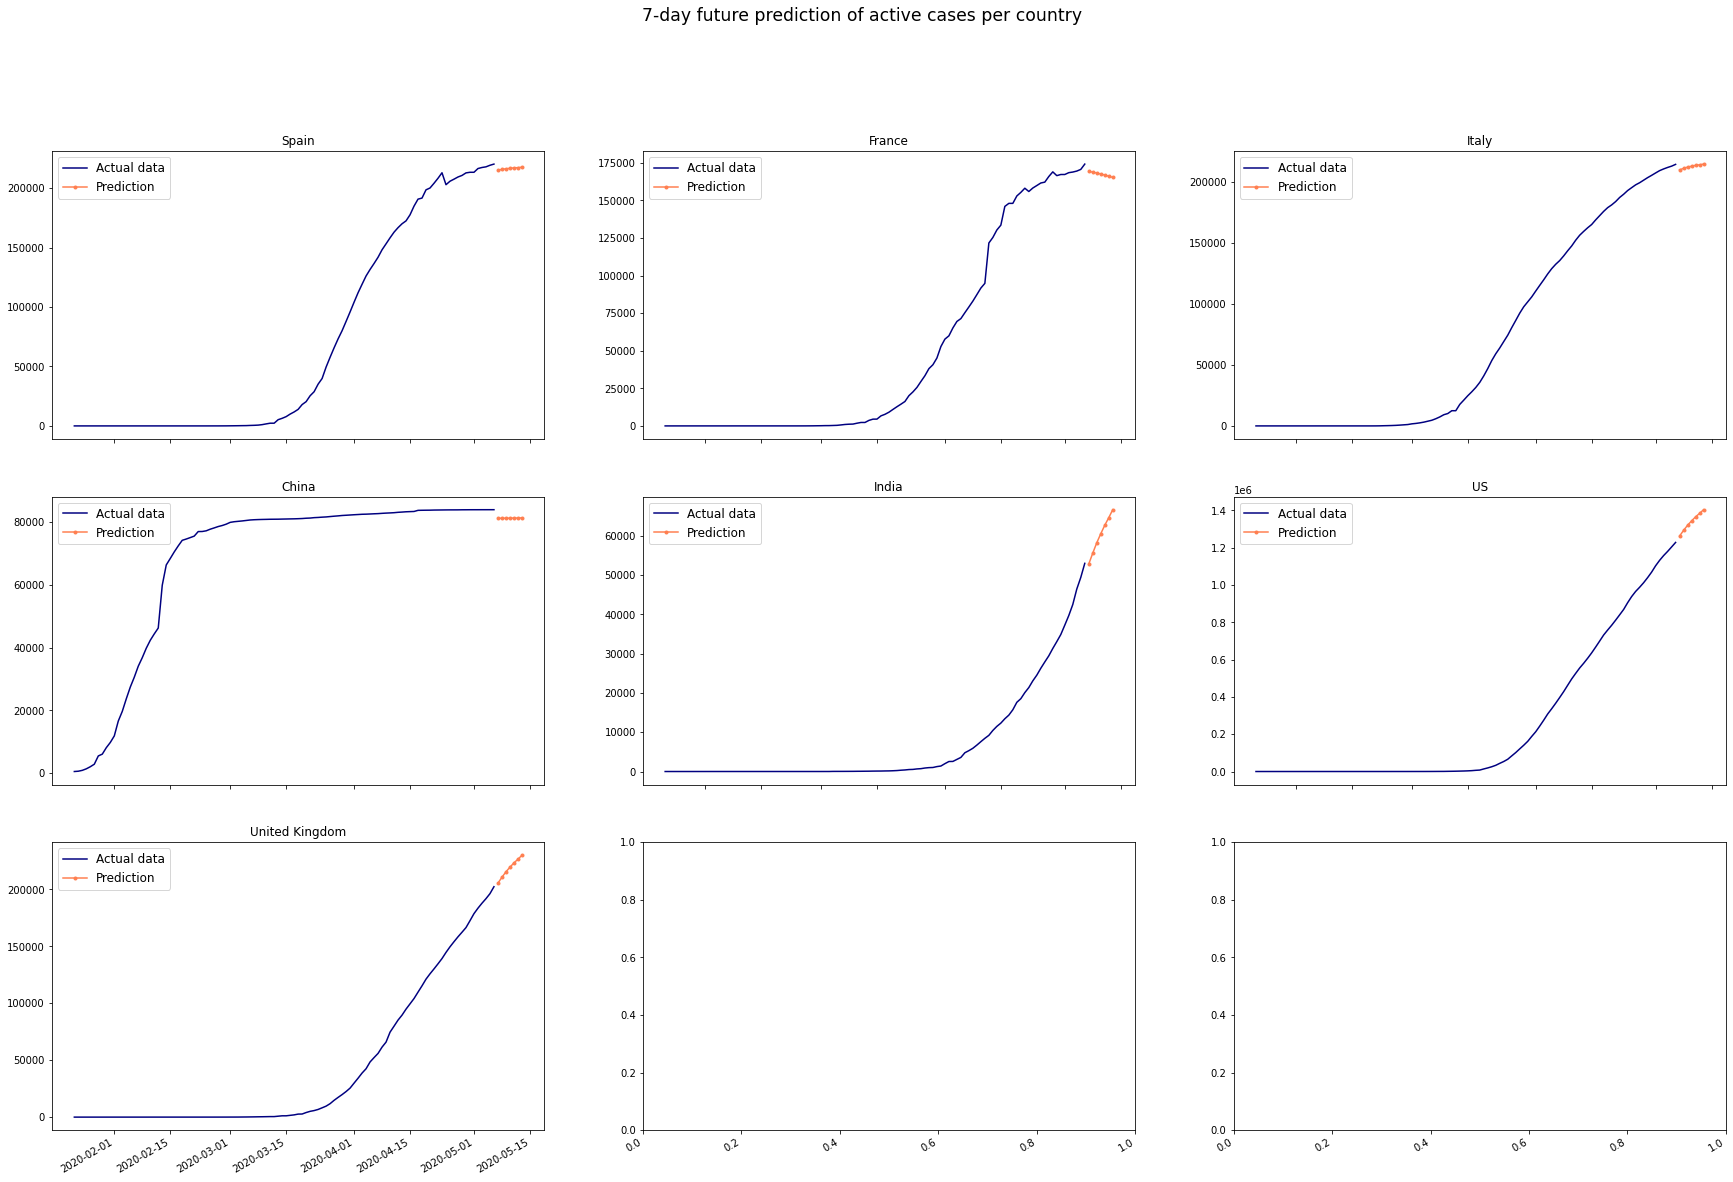

In [0]:
#Plot
fig, ax = plt.subplots(3,3, figsize=(30,20))
i = 0
j = 0
for x in countries:
  ax[i,j].set_title(x)
  ax[i,j].plot(df_train.index, df_train[x], color='navy', label='Actual data')
  ax[i,j].plot(df_pred.index, df_pred[x], color='coral', marker='o', markersize=3, label='Prediction')
  ax[i,j].legend(loc='upper left', fontsize='large')
  if j<2:
    j = j + 1
  else:
    i = i + 1
    j = 0

fig.suptitle(str(NBR_PREDICTIONS) + '-day future prediction of active cases per country', fontsize='xx-large')  
fig.autofmt_xdate()
plt.show()

# **The same procedure is followed for Deaths and the forcast is made.**

In [0]:
mor_confirm = df_pred

In [0]:
NBR_FEATURES = 7


NBR_PREDICTIONS = 10


NBR_SAMPLES = len(df_deaths)
NBR_TRAIN_SAMPLES = NBR_SAMPLES


TIME_STEPS = 5


BATCH_SIZE = 5
EPOCHS = 200

df_train = df_deaths.copy()
start_date = df_train.index[-1] + timedelta(days=1)
ind = pd.date_range(start_date, periods=NBR_PREDICTIONS, freq='D')
df_pred = pd.DataFrame(index=ind, columns=df_train.columns)
df_pred.fillna(value=0, inplace=True)

In [0]:
 from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
sc.fit(df_train)
sc_df_train = sc.transform(df_train)
print(sc_df_train.shape)

(106, 7)


In [0]:
X_train = []
y_train = []
for i in range(TIME_STEPS, NBR_TRAIN_SAMPLES):
    X_train.append(sc_df_train[i-TIME_STEPS:i, 0:NBR_FEATURES])
    y_train.append(sc_df_train[i, 0:NBR_FEATURES])
   
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], NBR_FEATURES))

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 

# Initialize structure
RNN = Sequential()

# Build layers: 2 LSTM layers with dropout 20% in each
RNN.add(LSTM(units = 512,return_sequences = True, input_shape = (X_train.shape[1], NBR_FEATURES)))
RNN.add(Dropout(0.2))
RNN.add(LSTM(units = 512))
RNN.add(Dropout(0.2))
# NBR_FEATURES output dense layer
RNN.add(Dense(units = NBR_FEATURES))

RNN.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 5, 512)            1064960   
_________________________________________________________________
dropout_23 (Dropout)         (None, 5, 512)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 3591      
Total params: 3,167,751
Trainable params: 3,167,751
Non-trainable params: 0
_________________________________________________________________


In [0]:
import tensorflow as tf

RNN.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Retrain the RNN with all available data
RNN.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE)

Epoch 1/200
101/101 [==============================] - 4s 35ms/step - loss: 0.0310
Epoch 2/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0061
Epoch 3/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0033
Epoch 4/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0028
Epoch 5/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0030
Epoch 6/200
101/101 [==============================] - 3s 27ms/step - loss: 0.0022
Epoch 7/200
101/101 [==============================] - 3s 27ms/step - loss: 0.0031
Epoch 8/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0054
Epoch 9/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0061
Epoch 10/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0043
Epoch 11/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0032
Epoch 12/200
101/101 [==============================] - 3s 28ms/step - loss: 0.0023
E

In [0]:
LSTM_predictions_scaled = list()
batch = sc_df_train[-TIME_STEPS:]
current_batch = batch.reshape((1, TIME_STEPS, NBR_FEATURES))

for i in range(len(df_pred)):   
    LSTM_pred = RNN.predict(current_batch)[0]
    LSTM_predictions_scaled.append(LSTM_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[LSTM_pred]],axis=1)

In [0]:
#Inverse Transform
LSTM_predictions = sc.inverse_transform(LSTM_predictions_scaled)
df_pred = pd.DataFrame(data=LSTM_predictions, index=df_pred.index, columns=df_pred.columns)

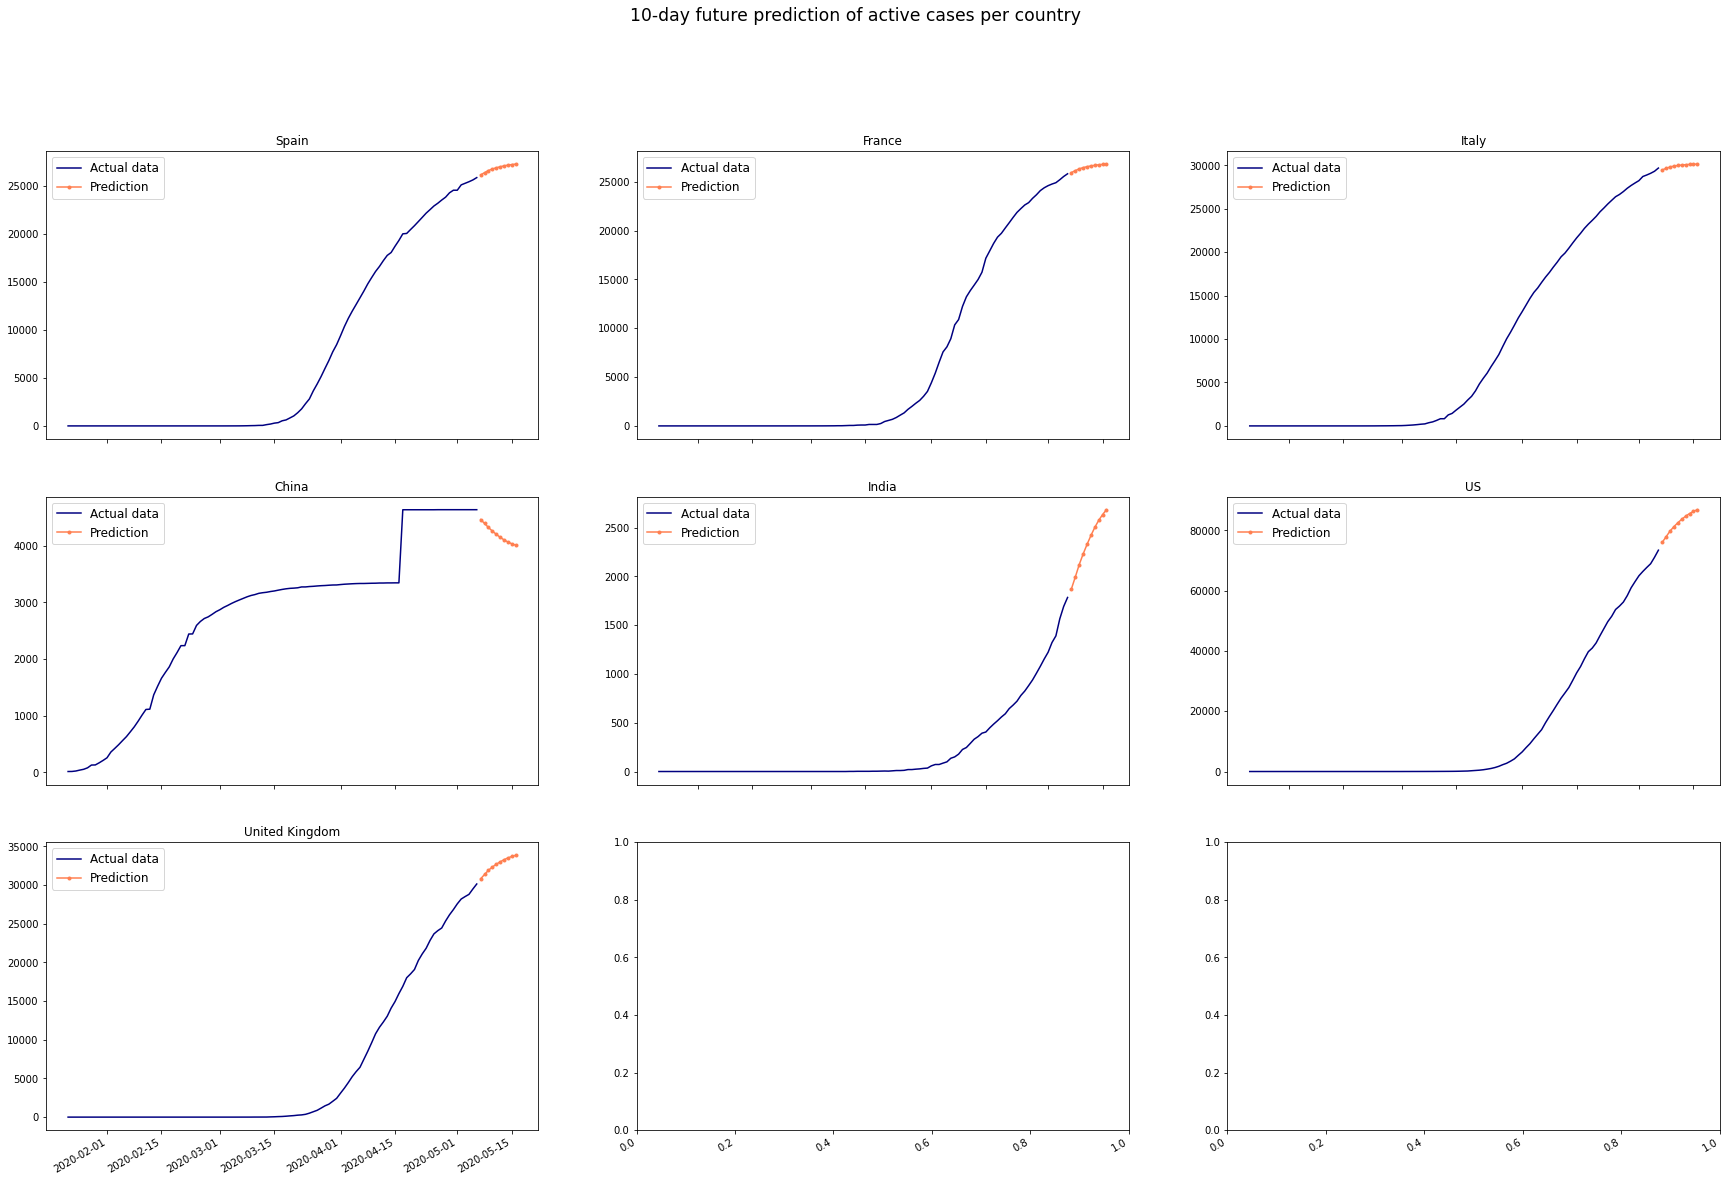

In [0]:
#Plot
fig, ax = plt.subplots(3,3, figsize=(30,20))
i = 0
j = 0
for x in countries:
  ax[i,j].set_title(x)
  ax[i,j].plot(df_train.index, df_train[x], color='navy', label='Actual data')
  ax[i,j].plot(df_pred.index, df_pred[x], color='coral', marker='o', markersize=3, label='Prediction')
  ax[i,j].legend(loc='upper left', fontsize='large')
  if j<2:
    j = j + 1
  else:
    i = i + 1
    j = 0

fig.suptitle(str(NBR_PREDICTIONS) + '-day future prediction of active cases per country', fontsize='xx-large')  
fig.autofmt_xdate()
plt.show()

In [0]:
mor_deaths = df_pred
mor_deaths

,Spain,France,Italy,China,India,US,United Kingdom
2020-05-07,26139.590855,25941.779902,29473.689878,4463.780732,1874.834658,76063.233516,30823.610294
2020-05-08,26375.017989,26137.075931,29651.970285,4394.678791,1996.442694,77929.128100,31378.063399
2020-05-09,26595.097881,26319.036110,29810.749420,4323.633265,2122.824004,79777.427833,31920.292765
2020-05-10,26753.073687,26443.760452,29910.700957,4260.419085,2231.003591,81257.434941,32340.787929
2020-05-11,26881.634201,26541.222306,29983.302588,4203.851318,2328.629290,82535.626478,32696.512735
2020-05-12,26985.686595,26616.043372,30030.479318,4150.567380,2420.435008,83684.596526,33009.679091
2020-05-13,27079.693466,26682.771848,30073.349560,4104.808572,2503.971763,84713.877818,33289.092690
2020-05-14,27157.375975,26736.339867,30105.688904,4066.881936,2575.803655,85582.415699,33523.004222
2020-05-15,27215.901401,26774.048872,30125.236177,4035.860841,2635.059317,86279.950884,33707.754833
2020-05-16,27264.498434,26804.508393,30140.208030,4010.554295,2684.992499,86862.436751,33861.268598


In [0]:
mortality = mor_deaths.div(mor_confirm) 

In [0]:
mortality.index.name = 'Date'


In [0]:
mor_rate = mortality*100

Mortality rates of specified based on forcast data is plot on graph.

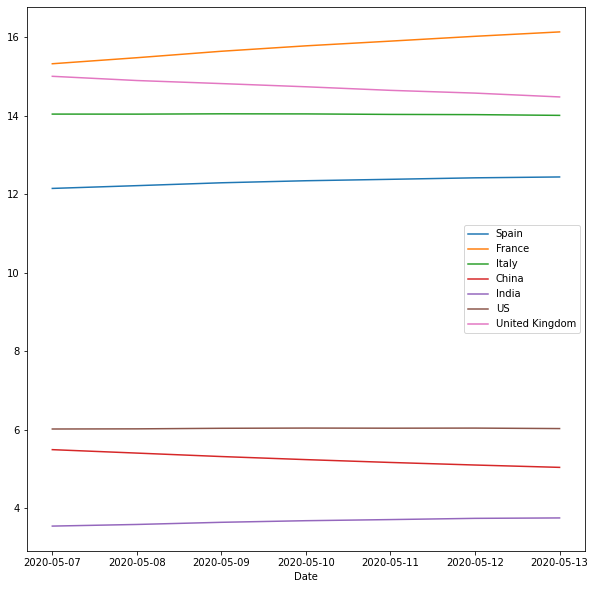

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.lineplot(data=mor_rate, palette="tab10", dashes=False)
